# Python Libraries

For this tutorial, we are going to explore the python libraries that include functionality that corresponds with the material discussed in the course.

The primary package we will be using is:

* **Statsmodels:** a library that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, exploring data, and constructing models.  

*__ATTN__: If you are not familiar with the following packages:*  

* **Numpy** is a library for working with arrays of data.  

* **Pandas** is a library for data management, manipulation, and analysis.  

* **Matplotlib** is a library for making visualizations.  

* **Seaborn** is a higher-level interface to Matplotlib that can be used to simplify many visualization tasks.  

We recommend you check out the first and second courses of the Statistics with Python specialization, **Understanding and Visualizing Data** and **Inferential Statistical Analysis with Python**.

*__Important__: While this notebooks provides insight into the basics of these libraries,  it is recommended that you dig into the documentation available online.*

## StatsModels

The StatsModels library is extremely extensive and includes functionality ranging from statistical methods to advanced topics such as regression, time-series analysis, and multivariate statistics.

We will mainly be looking at the stats, OLS, and GLM sub-libraries.  However, we will begin by reviewing some functionality that has been referenced in earlier course of the Statistics with Python specialization.

In [4]:
import statsmodels.api as sm
import numpy as np
import matplotlib as plt
import seaborn as sns

### Stats

#### Descriptive Statistics

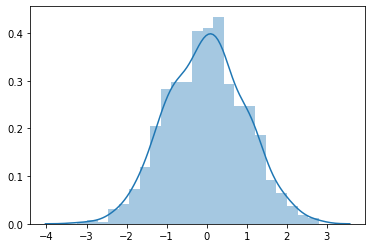

In [11]:
# Draw random variables from a normal distribution with numpy
normalRandomVariables = np.random.normal(0,1, 1000)
sns.distplot(normalRandomVariables)
# Create object that has descriptive statistics as variables
x = sm.stats.DescrStatsW(normalRandomVariables)

print(x)

As you can see from the above output, we have created an object with type: "statsmodels.stats.weightstats.DescrStatsW".  

This object stores various descriptive statistics such as mean, standard deviation, variance, ect. that we can access.

In [14]:
# Mean
print(x.mean)
# Standard deviation
print(x.std)
# Variance
print(x.var)

-0.015533790868748912
0.9756457187922069
0.951884568597562


The output above shows the mean, standard deviation, and variance of the 1000 random variables we drew from the distribution we generated above.

There are other interesting things you can do with this object, such as generating confidence intervals and hypothesis testing.

#### Confidence Intervals

In [15]:
# Generate confidence interval for a population proportion

tstar = 1.96

# Observer population proportion
p = .85

# Size of population
n = 659

# Construct confidence interval
sm.stats.proportion_confint(n * p, n)

(0.8227378265796143, 0.8772621734203857)

The above output includes the lower and upper bounds of a 95% confidence interval of population proportion.

In [18]:
import pandas as pd

# Import data that will be used to construct confidence interval of population mean
df = pd.read_csv("https://raw.githubusercontent.com/UMstatspy/UMStatsPy/master/Course_1/Cartwheeldata.csv")
print(df.head())
# Generate confidence interval for a population mean
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()

   ID  Age Gender  GenderGroup Glasses  GlassesGroup  Height  Wingspan  \
0   1   56      F            1       Y             1    62.0      61.0   
1   2   26      F            1       Y             1    62.0      60.0   
2   3   33      F            1       Y             1    66.0      64.0   
3   4   39      F            1       N             0    64.0      63.0   
4   5   27      M            2       N             0    73.0      75.0   

   CWDistance Complete  CompleteGroup  Score  
0          79        Y              1      7  
1          70        Y              1      8  
2          85        Y              1      7  
3          87        Y              1     10  
4          72        N              0      4  


(76.57715593233026, 88.38284406766975)

The output above shows the lower and upper bounds of a 95% confidence interval of population mean.

These functions should be familiar, if not, we recommend you take course 2 of our specialization.
#### Hypothesis Testing

In [19]:
# One population proportion hypothesis testing

# Population size
n = 1018

# Null hypothesis population proportion
pnull = .52

# Observe population proportion
phat = .56

# Calculate test statistic and p-value
sm.stats.proportions_ztest(phat * n, n, pnull)

(2.571067795759113, 0.010138547731721065)

In [22]:
# Using the dataframe imported above, perform a hypothesis test for population mean
sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")

(0.8234523266982029, 0.20512540845395266)

The outputs above are the test statistics and p-values from the respective hypothesis tests.

If you'd like to review these functions on your own, the stats sub-library documentation can be found at the following url: https://www.statsmodels.org/stable/stats.html

This concludes the review portion of this notebook,  now we are going to introduce the OLS and GLM sub-libraries and the functions you will be seeing throughout this course.

# OLS (Ordinary Least Squares), GLM (Generalized Linear Models), GEE (Generalize Estimated Equations), MIXEDLM (Multilevel Models)

The OLS, GLM, GEE, and MIXEDLM sub-libraries are the primary libraries in statsmodels that we will be utilizing in this course to create various models.

Below, we will give a brief description of each model and a skeleton of the functions you will see going forward in the course.  This is simply for you to get familiar with these concepts and to prepare you for the coming weeks.  If their application at this time seems a bit ambigious have no fear as they will be discussed in detail throughout this course!

For each of the following models, we follow our similar structure which means we will be following our structure of Dependent and Independent Variables, with a few caveats that will be expressed below.

#### Ordinary Least Squares

Ordinary Least Squares is a method for estimating the unknown parameters in a linear regression model.  This is the function we will use when our target variable is continuous.

In [ ]:
da = pd.read_csv("nhanes_2015_2016.csv")

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI",
        "SMQ020", "SDMVSTRA", "SDMVPSU"]
da = da[vars].dropna()

da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx", data=da)
res = model.fit()
print(res.summary())

The above code is creating a multiple linear regression where the target variable is BPXSY1 and the two predictor variables are RIDAGEYR and RIAGENDRx.

Note that the target variable, BPXSY1, is a continous variable that represents blood pressure.

#### Generalized Linear Models

While generalized linear models are a broad topic, in this course we will be using this suite of functions to carry out logistic regression.  Logistic regression is used when our target variable is a binary outcome, or a classification of two groups, which can be denoted as group 0 and group 1.

In [9]:
da["smq"] = da.SMQ020.replace({2: 0, 7: np.nan, 9: np.nan})
model = sm.GLM.from_formula("smq ~ RIAGENDRx", family=sm.families.Binomial(), data=da)
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5092
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3350.6
Date:                Wed, 23 Sep 2020   Deviance:                       6701.2
Time:                        14:28:15   Pearson chi2:                 5.09e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7547      0.042    -18.071      0.000      -0.837      -0.673
RIAGENDRx[T.Male]     0.8851   

Above is a example of creating a logistic model where the target value is SMQ020x, which in this case is whether or not this person is a smoker or not.  The predictor is RIAGENDRx, which is gender.

#### Generalized Estimated Equations

Generalized Estimating Equations estimate generalized linear models for panel, cluster or repeated measures data when the observations are possibly correlated within a cluster but uncorrelated across clusters.  These are used primarily when there is uncertainty regarding correlation between outcomes. "Generalized Estimating Equations" (GEE) fit marginal linear models, and estimate intraclass correlation.

In [10]:
da["group"] = 10*da.SDMVSTRA + da.SDMVPSU
model = sm.GEE.from_formula("BPXSY1 ~ 1", groups="group", cov_struct=sm.cov_struct.Exchangeable(), data=da)
res = model.fit()
print(res.cov_struct.summary())


The correlation between two observations in the same cluster is 0.030


Here we are creating a marginal linear model of BPXSY1 to determine the estimated ICC value, which would indicate whether or not there are correlated clusters of BPXSY1.

#### Multilevel Models

Similarly to GEEs, we use multilevel models when there is potential for outcomes to be grouped together which is not uncommon when using various sampling methods to collect data.

In [11]:
for v in ["BPXSY1", "RIDAGEYR", "BMXBMI", "smq", "SDMVSTRA"]:
    model = sm.GEE.from_formula(v + " ~ 1", groups="group",
           cov_struct=sm.cov_struct.Exchangeable(), data=da)
    result = model.fit()
    print(v, result.cov_struct.summary())

BPXSY1 The correlation between two observations in the same cluster is 0.030
RIDAGEYR The correlation between two observations in the same cluster is 0.035
BMXBMI The correlation between two observations in the same cluster is 0.039
smq The correlation between two observations in the same cluster is 0.026
SDMVSTRA The correlation between two observations in the same cluster is 0.959


What;s nice about the statsmodels library is that all the models follow the similar structure and syntax.  


Documentation and examples of these models can be found at the following links:

* OLS: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

* GLM: https://www.statsmodels.org/stable/glm.html

* GEE: https://www.statsmodels.org/stable/gee.html

* MIXEDLM: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

Feel free to read up on these sub-libraries and their use cases.  In week 2 you will see examples of OLS and GLM, where in week 3, we will be implementing GEE and MIXEDLM.

In [27]:
bmi = 0.003
age = 0.0169
sd = -1.2435 + (bmi * 22) + (age * 45)
sd

-0.41700000000000004